In [1]:
import numpy as np
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import skimage
import imageio.v2 as io
root = '/mnt/e/julia/regional-representations-graph-model/'
import sys
sys.path.append(root + 'train/')
from dataset_classes import * 
from models import *
import geopandas as gpd
import contextily as cx

In [2]:
sys.path.append(root + 'utils/')
from utils import *

In [3]:
import os
# import geemap

In [4]:
#      Read in Tract shapefiles
tract_data_dir = root + 'dataset/Tracts/nyc_metro_boundaries/nyc_metro_boundaries.shp'
geodf = gpd.read_file(tract_data_dir)
geodf.rename(columns={'GEOID_TRAC': 'GEOID'}, inplace=True)  
geodf = geodf[['GEOID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'geometry']] 
def plot_list_geoids(geoid=None, df=None, col=None, cmap='Spectral', axes=None):
    if geoid is None:
        df_select = geodf
    else:
        df_select = geodf.loc[geodf.GEOID.isin(geoid)]
    
    if col == None:
        ax = df_select.boundary.plot(figsize=(15,12), linewidth=5, color='orange')
#         plt.title(f'{scenario} - {col}')
    else:
        temp = df_select.merge(df[['GEOID', col]], on='GEOID', how='left')
        if axes is not None:
            ax = temp.plot(column=col, legend=True, figsize=(10,8), cmap=cmap, ax=axes) #  palette=plt.colormaps['GnBu']
        else:
            ax = temp.plot(column=col, legend=False, figsize=(15,12), linewidth=8, cmap=cmap)
        plt.title(f'{scenario} - {col}')
    cx.add_basemap(ax, crs=df_select.crs.to_string())
    
    return ax
    # minx, miny, maxx, maxy = df_select.total_bounds
    # ax.set_xlim(minx, maxx)
    # ax.set_ylim(miny, maxy)

In [7]:
import os
def Count_files_in_subd():
    l = []
    counter=0
    for root, dirs, files in os.walk("download_landsat_images/"):
        # print("{} in {}".format(len(files), root))
        l.append(len(files))
        for f in files:
            if f == 'sentinel2.tif':
                counter+=1
        if len(files) == 0:
            print(root)
    al = len(os.listdir("download_landsat_images/"))
    print(f'Num folders total: {al}')
    print(f'Num folders with 0 files: {l.count(0)}')
    print(f'Num folders with >0 files: {al - l.count(0)}')
    print(f'Num target files total: {counter}')
    print()
    
Count_files_in_subd()

download_landsat_images/
download_landsat_images/.ipynb_checkpoints
download_landsat_images/36031961400
download_landsat_images/36103990100
Num folders total: 8232
Num folders with 0 files: 4
Num folders with >0 files: 8228
Num target files total: 5498



In [ ]:
# download_landsat_images/
# download_landsat_images/.ipynb_checkpoints
# download_landsat_images/36031961400
# download_landsat_images/36103990100
# Num folders total: 8232
# Num folders with 0 files: 4
# Num folders with >0 files: 8228
# Num target files total: 5424

# Plot 15 images

In [ ]:
earth_engine_filename = 'sentinel2.tif'
# earth_engine_filename = 'least_cloudy_m6_m10_rectangle_highres.tif'

fn = earth_engine_filename

In [ ]:
node_list_path = root + f'dataset/preprocessed_data/all_valid_data/node_list.csv'
node_list = pd.read_csv(node_list_path, dtype={'GEOID': str})

In [11]:
# tract_data_dir = r'../Tracts/nyc_metro_boundaries/nyc_metro_boundaries.shp'
# temp_tract_data_dir = "../Tracts/nyc_metro_boundaries/temp.shp"
# temp_envelope_data_dir = "../Tracts/nyc_metro_boundaries/temp_envelope.shp"

# df = gpd.read_file(tract_data_dir)
# df.rename(columns={'GEOID_TRAC': 'GEOID'}, inplace=True)  
# # print(df.head())
# shapefile = df[['GEOID', 'geometry']] 
# node_list = shapefile[0:40]

# Pixel counts

In [48]:
# count num pixels and assign each geoid to a bin
geoid_list = []
pixels_list = []

counter = 0
for roott, dirs, files in os.walk(root + "dataset/earth_engine/download_landsat_images/"):
    if fn in files:
        geoid = roott.split('download_landsat_images/')[1]
        if geoid not in node_list.GEOID.unique():
            continue
        img = io.imread(roott + '/' + fn)
#         B2_blue = img[:,:,0]
#         B3_green = img[:,:,1]
#         B4_red = img[:,:,2]

#         rgb = np.stack([B4_red, B3_green, B2_blue])
#         mod = rgb.transpose(1, 2, 0)
#         mod[mod == -np.inf] = np.nan

#         mod1 = make_color_image_eqh(mod[:,:,0], mod[:,:,1], mod[:,:,2])
#         plt.figure()
#         plt.imshow(mod1)
#         plt.title(geoid)
#         counter +=1
#         if counter> 10:
#             break
        
        npixels = img.shape[0] * img.shape[1]
        pixels_list.append(npixels)
        geoid_list.append(geoid)
        
pixels = pd.DataFrame(list(zip(geoid_list, pixels_list)), columns=['GEOID', 'npixels'])
pixels['pixel_bin'] = pd.qcut(pixels['npixels'], q=4, retbins=False, labels=False)
# pixels.to_csv('landsat_resolution_binned_geoids.csv', index=False)

1485


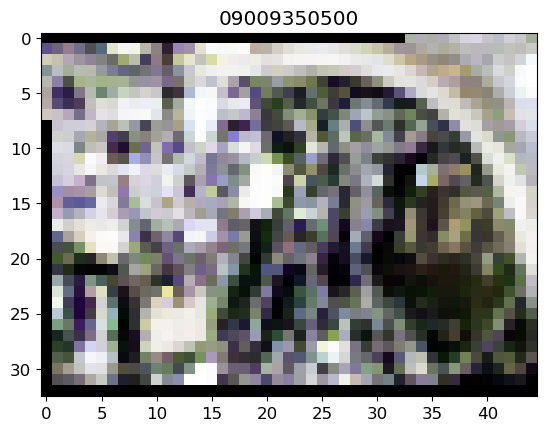

In [55]:
geoid ='09009350500'
p = root + "dataset/earth_engine/download_landsat_images/09009350500/" + fn
img = io.imread(p)

B2_blue = img[:,:,0]
B3_green = img[:,:,1]
B4_red = img[:,:,2]

rgb = np.stack([B4_red, B3_green, B2_blue])
mod = rgb.transpose(1, 2, 0)
mod[mod == -np.inf] = np.nan

mod1 = make_color_image_eqh(mod[:,:,0], mod[:,:,1], mod[:,:,2])
plt.figure()
plt.imshow(mod1)
plt.title(geoid)
npixels = img.shape[0] * img.shape[1]
print(npixels)

In [49]:
pixels.npixels.describe()

count      4599.000000
mean      10669.636878
std       27734.493789
min          72.000000
25%         483.000000
50%        1862.000000
75%        7413.000000
max      316008.000000
Name: npixels, dtype: float64

In [8]:
import random
geoid_list = []
pixels_list = []
counter = 0
# for roott, dirs, files in os.walk("download_landsat_images/"):
for geoid in random.choices(node_list.GEOID, k=7):
    roott = "download_landsat_images/" + geoid
    if fn in files:
#         print(root)
        img = io.imread(roott + '/' + fn)
        npixels = img.shape[0] * img.shape[1]
        if npixels > 100:
            B2_blue = img[:,:,0]
            B3_green = img[:,:,1]
            B4_red = img[:,:,2]

            rgb = np.stack([B4_red, B3_green, B2_blue])
            mod = rgb.transpose(1, 2, 0)
            mod[mod == -np.inf] = np.nan

            mod1 = make_color_image_eqh(mod[:,:,0], mod[:,:,1], mod[:,:,2])
            
            plt.figure()
            plt.imshow(mod1)
            plt.title('Geoid: ' + roott[-11:])
            geoid_list.append(roott[-11:])
            
#         pixels_list.append(npixels)
            counter += 1
            if counter > 5:
                break

NameError: name 'files' is not defined

<Axes: title={'center': ' - index'}>

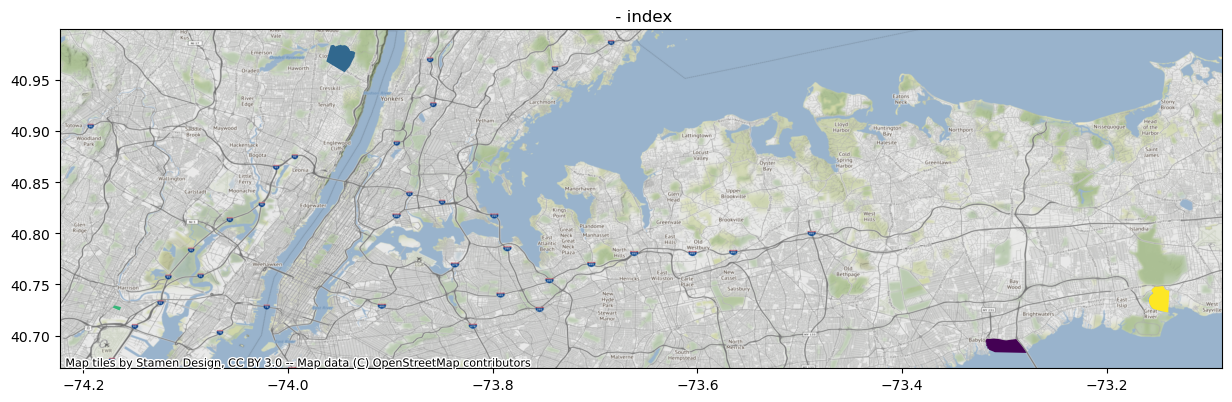

In [101]:
plot_list_geoids(geoid=geoid_list[0:4], df=pd.DataFrame(geoid_list[0:4], columns=['GEOID']).reset_index(), col='index', cmap='viridis', axes=None)

In [8]:
import os# run to delete a file
for root, dirs, files in os.walk("download_landsat_images/"):
    if root == 'download_landsat_images/' or root == 'download_landsat_images/.ipynb_checkpoints' :
        continue
    path = root + '/' + 'sentinel2/tif'
    files = os.listdir(root)
    for f in files:
        if 'sentinel2' in f:
            try:
                os.remove(root+'/'+f)
                print('delete')
            except:
                continue
#     try:
#         os.remove(path)
#     except:
#         print('.')

delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete

delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete

delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete

delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete

delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete
delete

# READ and NORMALIZE IMAGES


# Read a single image. 

In [36]:
geodf['GEOID'][0:5]

0    09009350400
1    09009350500
2    09009352701
3    09009352702
4    09009352800
Name: GEOID, dtype: object

(104, 116, 3)


<Figure size 600x500 with 0 Axes>

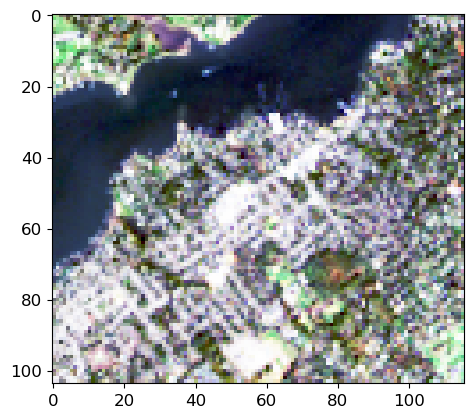

In [154]:
# Normalize and adjust brightness of each band individually
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,5))
img_path = 'test_landsat.tif'#'download_landsat_images/09009350400/' + fn
img = io.imread(img_path)

B2_blue = img[:,:,1]
B3_green = img[:,:,2]
B4_red = img[:,:,3]

rgb = np.stack([B4_red, B3_green, B2_blue])
mod = rgb.transpose(1, 2, 0)
# mod[mod == -np.inf] = np.nan

mod1 = make_color_image_eqh(mod[:,:,0], mod[:,:,1], mod[:,:,2])

print(mod.shape)
plt.figure()
plt.imshow(mod1)
# plt.figure()
# plt.imshow(mod2)

In [93]:
image=src.read()
image.shape

(23, 309, 449)

In [122]:
arr_norm.transpose(1, 2, 0).shape

(309, 449, 3)

In [138]:
arr.shape

(17, 104, 116)

In [141]:

arr_norm.shape

(3, 17, 104)

In [149]:
arr[0,:,:].shape

(104, 116)

In [151]:
B2_blue.shape

(104, 116)


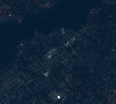

In [153]:
import folium
import rasterio
from rasterio.plot import show

# # Load the raster image

img_path = 'test_landsat.tif'#'download_landsat_images/09009350400/' + fn

with rasterio.open(img_path) as src:
    arr = src.read()

    B2_blue = arr[0,:,]
    B3_green = arr[1,:,:]
    B4_red = arr[2,:,:]

    arr = np.stack([B4_red, B3_green, B2_blue])

# Normalize pixel values to 0-255 range
arr_norm = (255*(arr - arr.min()) / (arr.max() - arr.min())).astype('uint8')

# Convert to PIL Image
im = Image.fromarray(arr_norm.transpose(1, 2, 0))

# Adjust brightness by multiplying pixel values by a scalar factor
brightness = 1.0 # adjust as needed
im_bright = Image.eval(im, lambda x: x*brightness)

# Convert back to numpy array
arr_bright = np.array(im_bright)

# Visualize with folium
import folium
from folium import plugins

# Define map center and zoom level
lat, lon = 38.8951, -77.0364
zoom_start = 10

# Create a folium map
m = folium.Map(location=[lat, lon], zoom_start=zoom_start)

# Add the image layer to the map
folium.raster_layers.ImageOverlay(
    image=arr_bright,
    bounds=[[src.bounds.bottom, src.bounds.left], [src.bounds.top, src.bounds.right]],
    opacity=1,
    interactive=True,
    cross_origin=False,
    colormap=lambda x: (0, 0, 0, x),
).add_to(m)

# Display the map
m

(309, 449, 3)


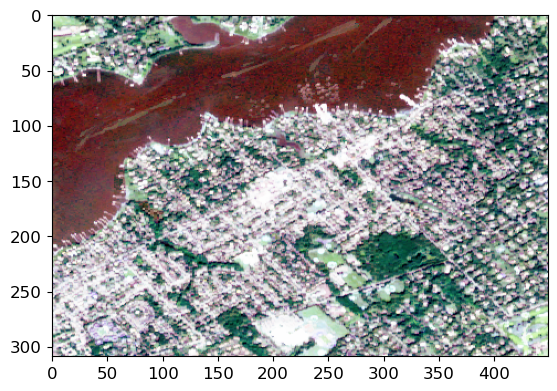

In [134]:
# Normalize and adjust brightness of each band individually
plt.rcParams.update({'font.size': 12})

img_path = 'test_sentinel.tif'#'download_landsat_images/09009350400/' + fn
img = io.imread(img_path)

B2_blue = img[:,:,0]
B3_green = img[:,:,1]
B4_red = img[:,:,2]

rgb = np.stack([B2_blue, B3_green, B4_red])# [B4_red, B3_green, B2_blue]
mod = rgb.transpose(1, 2, 0)
# mod[mod == -np.inf] = np.nan

mod1 = make_color_image_eqh(mod[:,:,0], mod[:,:,1], mod[:,:,2]) #make_color_image_eqh


print(mod.shape)
plt.figure()
plt.imshow(mod1)
# plt.figure()
# plt.imshow(mod2)

# Same for multiple randomly chosen images.

In [21]:
sys.path.append(root + 'train/utils/')
from helper_funcs import *

36059519601
36047039000
34021004314
36047078802
34013020500
36005013500
36005022200
36005037300
34013020300


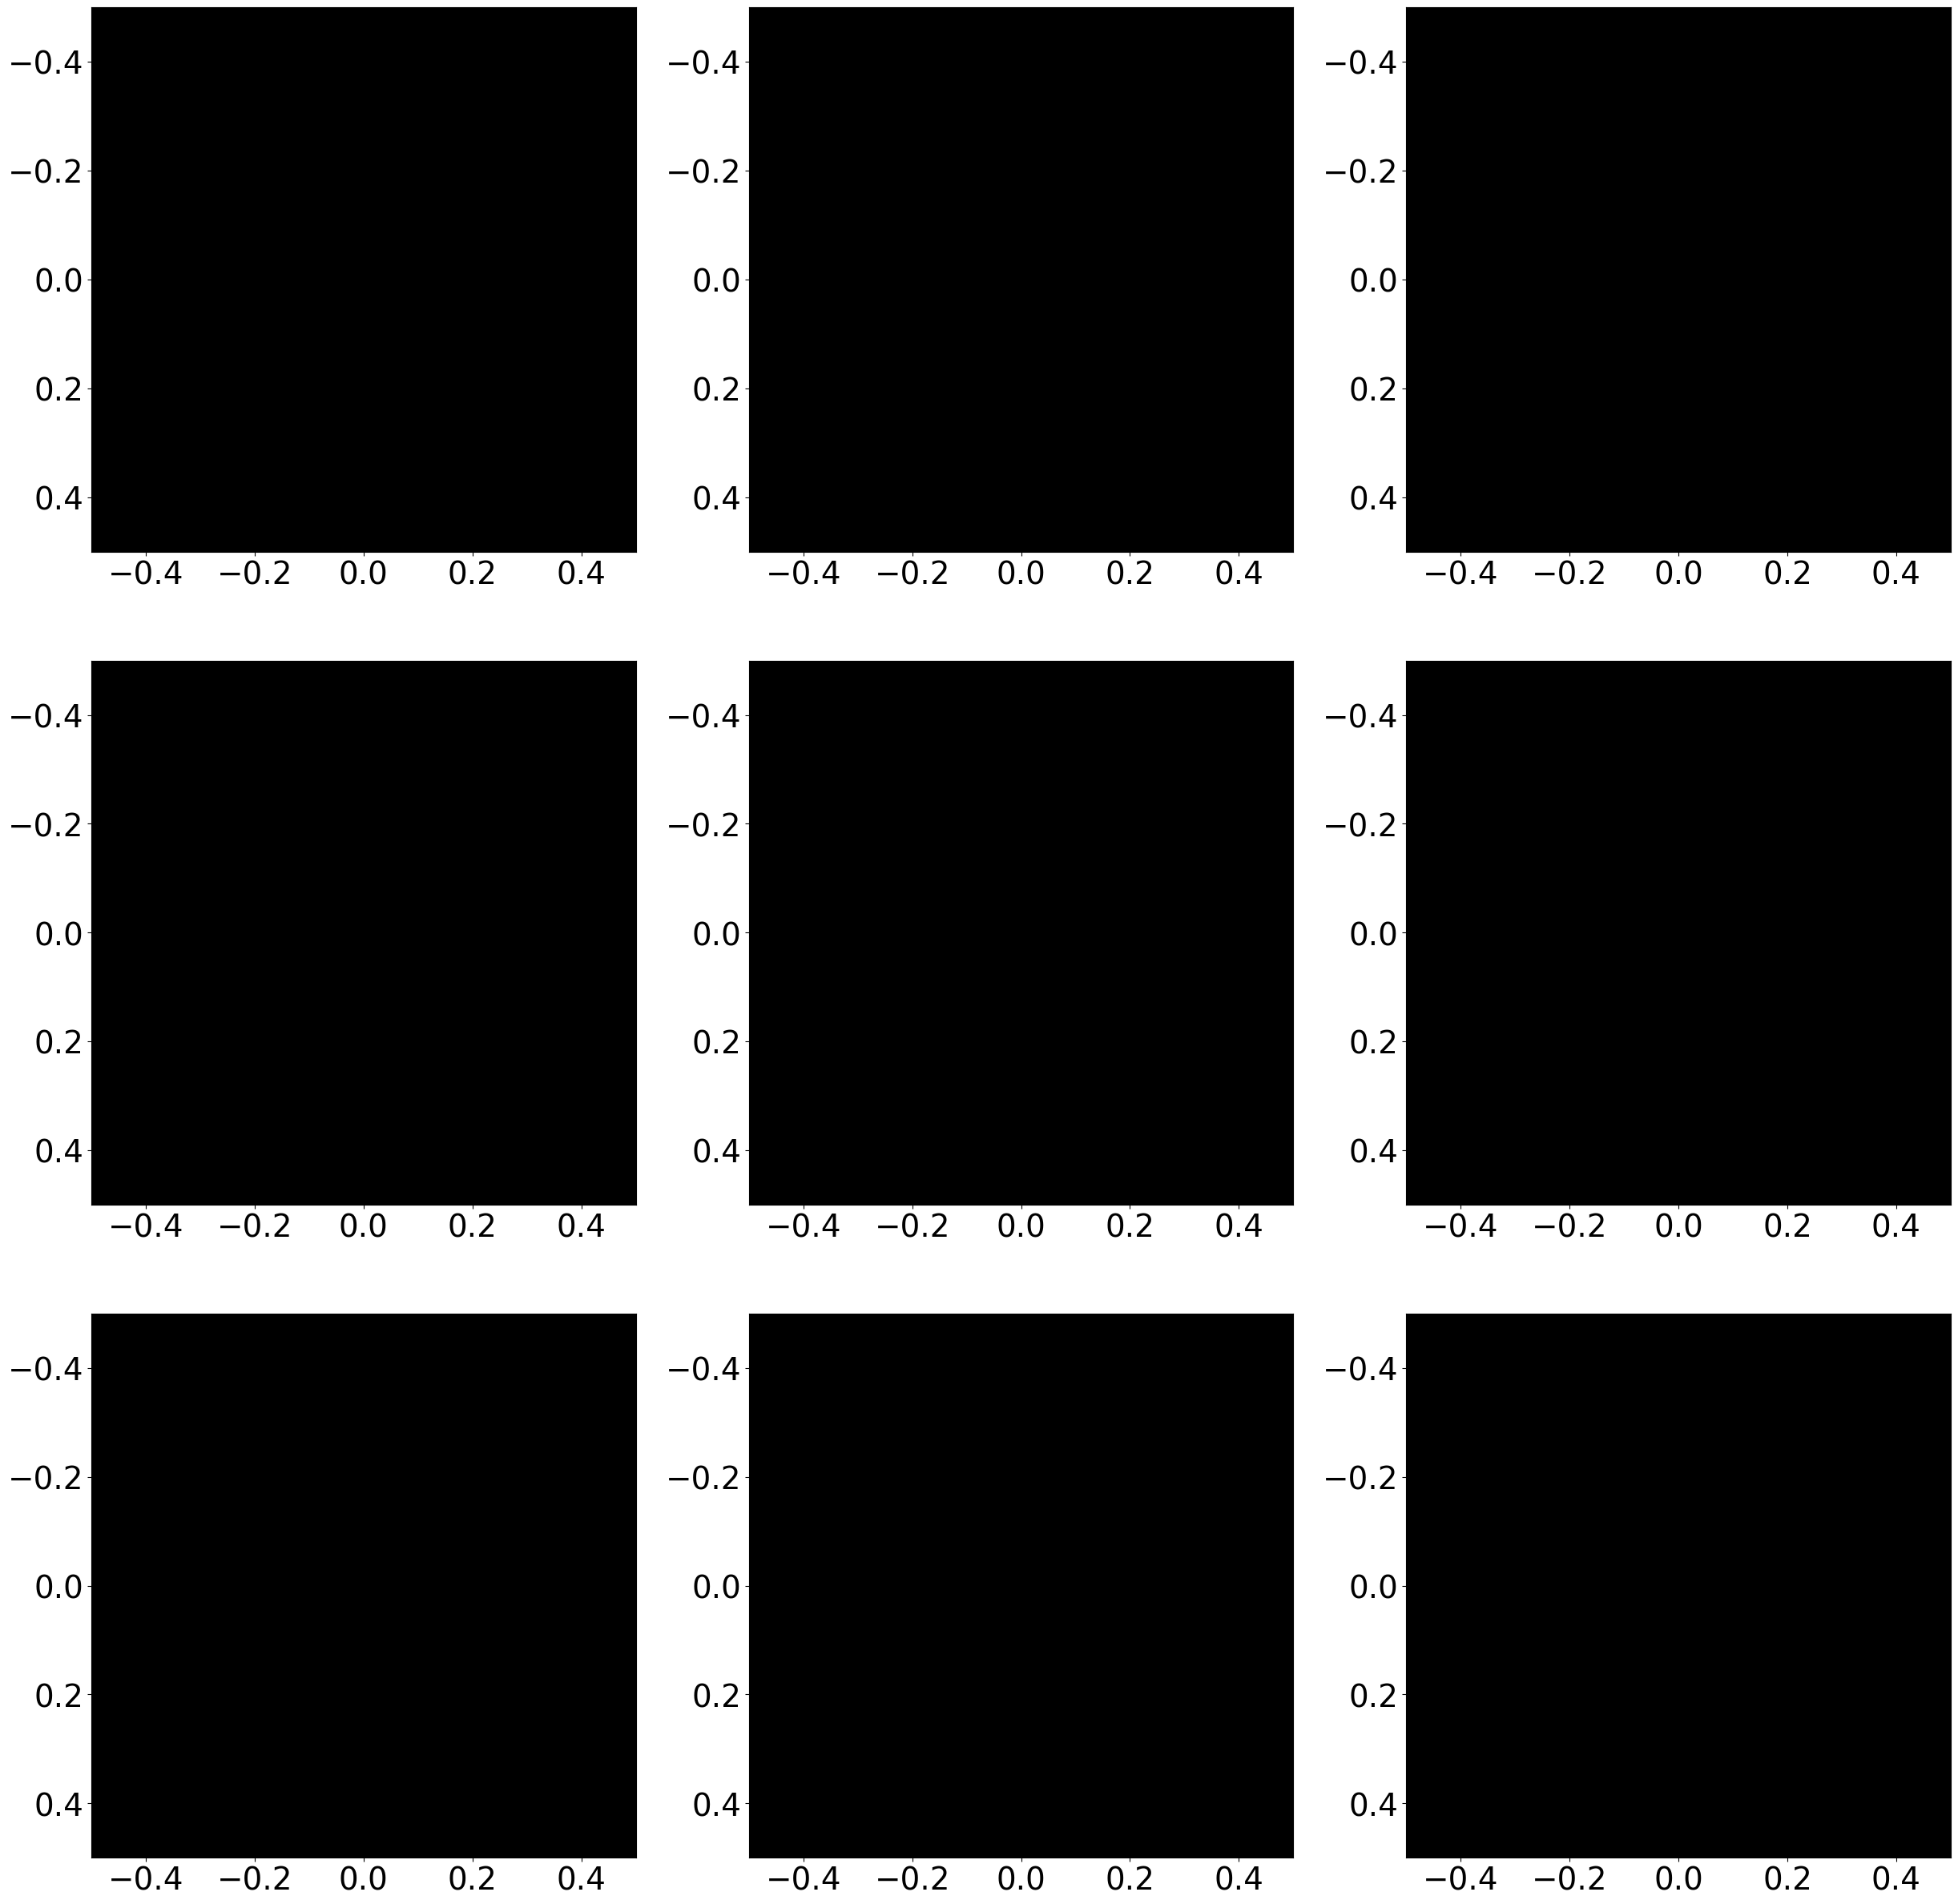

In [32]:
import random
plt.rcParams.update({'font.size': 28})
r, c = 3, 3


geoids = geodf.GEOID
fig, axs = plt.subplots(r, c, figsize=(30, 30))
for i in range(r):
    for j in range(c):
        select = random.choice(geoids)
        img = imageio.imread(f'download_landsat_images/{select}/' + fn)
        print(select)
    
        B2_blue = img[:,:,0]
        B3_green = img[:,:,1]
        B4_red = img[:,:,2]
        
        rgb = np.stack([B4_red, B3_green, B2_blue])
        mod = rgb.transpose(1, 2, 0)
#         mod[mod == -np.inf] = np.nan

#         # normalize
#         mod1 = np.zeros(mod.shape)
#         mod2 = np.zeros(mod.shape)
#         for band in (0,1,2):
#             mod1[:,:,band] = norm(mod[:,:,band])
        
        mod1 = make_color_image_eqh(mod[:,:,0], mod[:,:,1], mod[:,:,2])
        
#         mod1 = mod1[0:20, 0:20, :]
        
        axs[i][j].imshow((mod1))

In [24]:
print(f'Max: {np.nanmax(mod)}')
print(f'Min: {np.nanmin(mod)}')

print(f'Max: {np.nanmax(mod1)}')
print(f'Min: {np.nanmin(mod1)}')

Max: 0
Min: 0
Max: nan
Min: nan


/tmp/ipykernel_20456/1925956103.py:4: RuntimeWarning: All-NaN slice encountered
  print(f'Max: {np.nanmax(mod1)}')
/tmp/ipykernel_20456/1925956103.py:5: RuntimeWarning: All-NaN slice encountered
  print(f'Min: {np.nanmin(mod1)}')


# Plot original vs transformed

Below is the original versus the transformed image using the full typical ResNet transformation described in the below box.

In [4]:
import torch
import torchvision

transforms = torchvision.transforms.Compose([
            torchvision.transforms.Resize((224, 224)),
            torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])


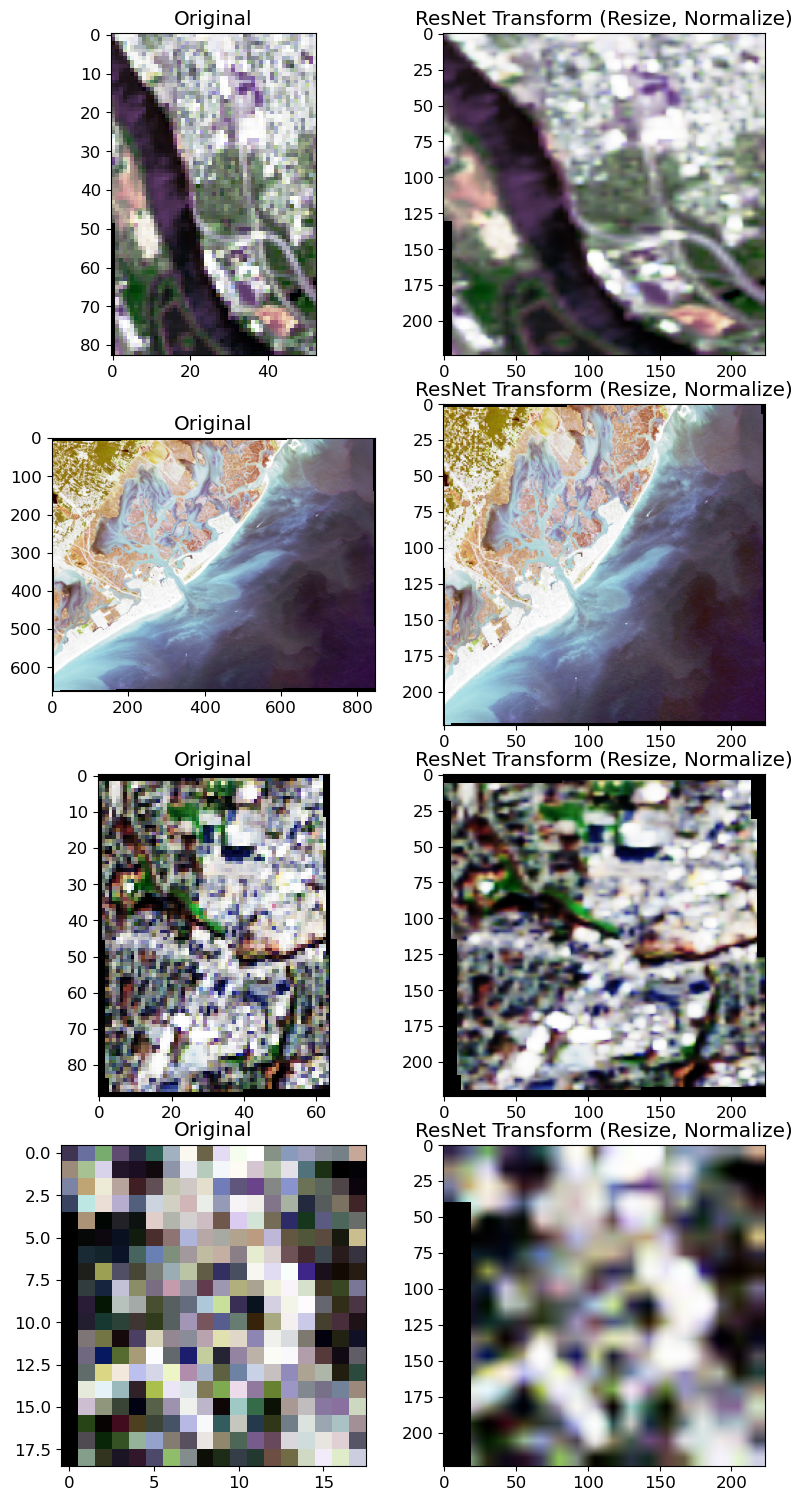

In [7]:
import random
plt.rcParams.update({'font.size': 12})
r, c = 4, 2

dirs = [x[0] for x in os.walk('download_landsat_images/')]
fig, axs = plt.subplots(r, c, figsize=(8, 15))
fig.tight_layout()
for i in range(r):
    select = random.choice(dirs)
    img = imageio.imread(f'{select}/least_cloudy_rectangle_highres.tif')

    img = np.array(img)
    B1 = img[:,:,0]
    B2 = img[:,:,1]
    B3 = img[:,:,2]
    rgb = np.stack([B3, B2, B1], axis=0)
    
    # original
    rgb1 = rgb.transpose(1, 2, 0)
    rgb1[rgb1 == -np.inf] = np.nan
    rgb1[rgb1 == np.inf] = np.nan
    
    mod1 = equalize_exposure(rgb1[:,:,0], rgb1[:,:,1], rgb1[:,:,2]) #make_color_image_eqh
    axs[i][0].set_title('Original')
    axs[i][0].imshow(mod1)
    
#     # transformed
    t = torch.tensor(rgb)
    out = np.array(transforms(t))
    out = out.transpose(1, 2, 0)
    out = equalize_exposure(out[:,:,0], out[:,:,1], out[:,:,2])
    
    axs[i][1].set_title('ResNet Transform (Resize, Normalize)')
    axs[i][1].imshow(out)

Below is the original versus the transformed image using just the ResNet normalization.

In [8]:
transforms = torchvision.transforms.Compose([
            torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])

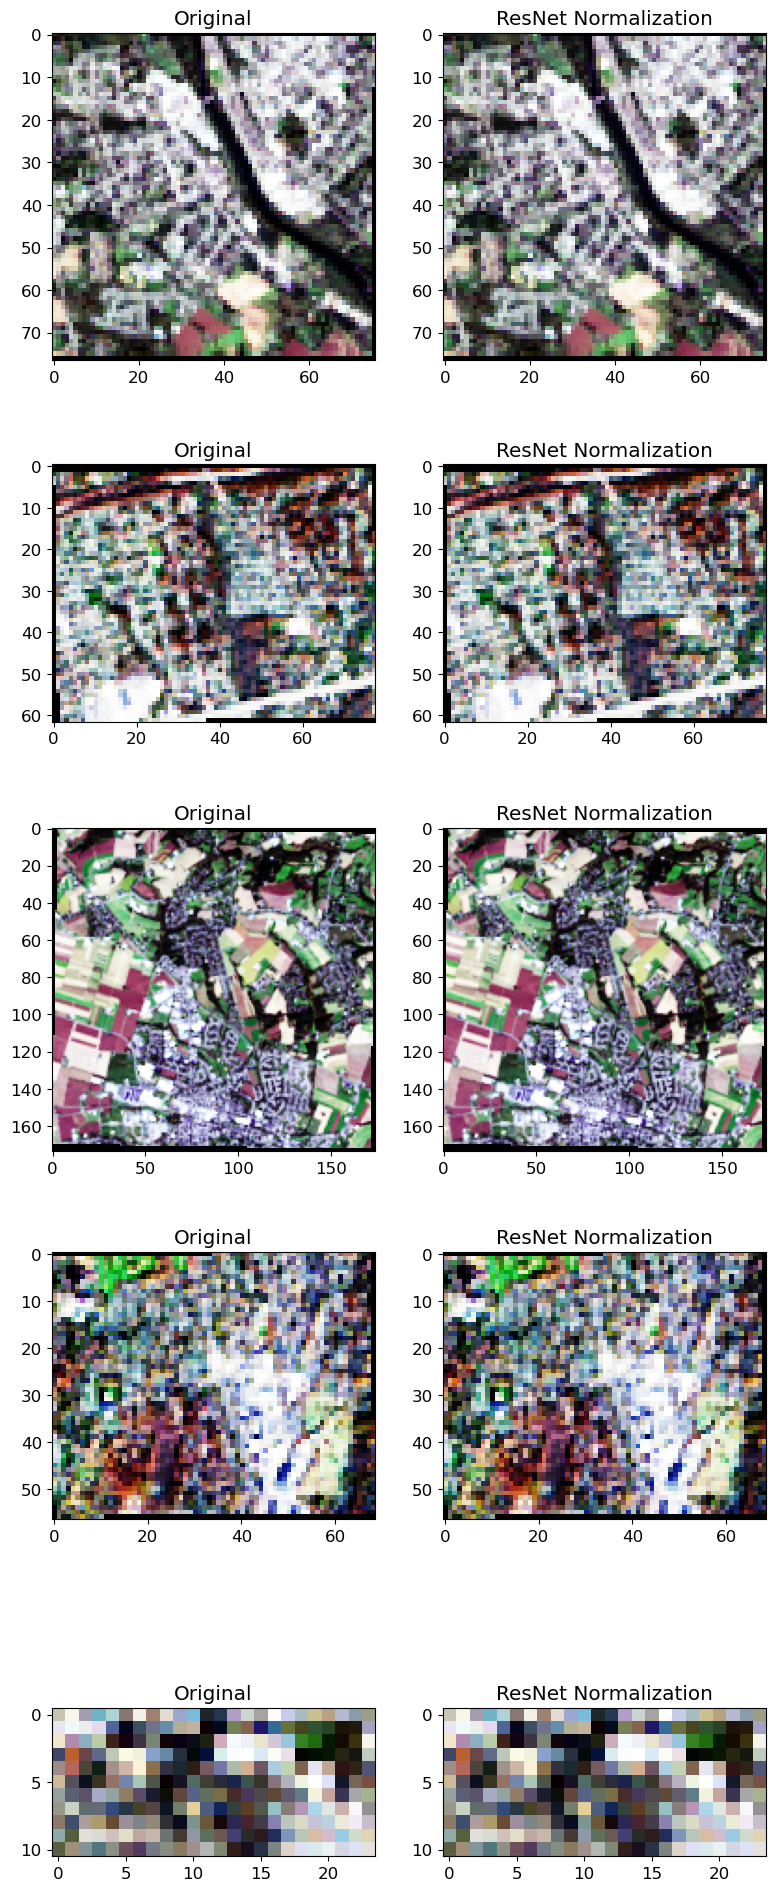

In [9]:
plt.rcParams.update({'font.size': 12})
r, c = 5, 2

dirs = [x[0] for x in os.walk('download_landsat_images/')]
fig, axs = plt.subplots(r, c, figsize=(8, 20))
fig.tight_layout()
for i in range(r):
    select = random.choice(dirs)
    img = imageio.imread(f'{select}/least_cloudy_rectangle_highres.tif')

    img = np.array(img)
    B1 = img[:,:,0]
    B2 = img[:,:,1]
    B3 = img[:,:,2]
    rgb = np.stack([B3, B2, B1], axis=0)
    
    # original (regular bandwise min-max normalization)
    rgb1 = rgb.transpose(1, 2, 0)
    rgb1[rgb1 == -np.inf] = np.nan
    rgb1[rgb1 == np.inf] = np.nan
    
    mod1 = make_color_image_eqh(rgb1[:,:,0], rgb1[:,:,1], rgb1[:,:,2])
    axs[i][0].set_title('Original')
    axs[i][0].imshow(mod1)
    
    # transformed
    t = torch.tensor(rgb)
    out = np.array(transforms(t))
    out = out.transpose(1, 2, 0)
    out = equalize_exposure(out[:,:,0], out[:,:,1], out[:,:,2])
    
    axs[i][1].set_title('ResNet Normalization')
    axs[i][1].imshow(out)

# Check image downsample/upsample transformation

In [7]:
import skimage
root = '/mnt/e/julia/regional-representations-graph-model/'
scenario = 'lowres_landsat_experiment/'
node_list_path= root + f'dataset/preprocessed_data/{scenario}node_list.csv'
device='cpu'

earth_engine_filename = 'least_cloudy_m6_m10_rectangle_highres.tif'
fn = earth_engine_filename

#### LANDSAT #####
landsat_model = ResNetTransform(device)
datasets1 = SatelliteImageryDataset(node_list_path=node_list_path, 
                                    root_image_dir=root + '/dataset/earth_engine/download_landsat_images', 
                                    fn=fn, is_train=True, transform=landsat_model, 
                                    load_embeddings=False)

Pytorch interpolation looks like it preserves the edges better than skimage.
https://stackoverflow.com/questions/64284755/what-is-the-upsampling-method-called-area-used-for

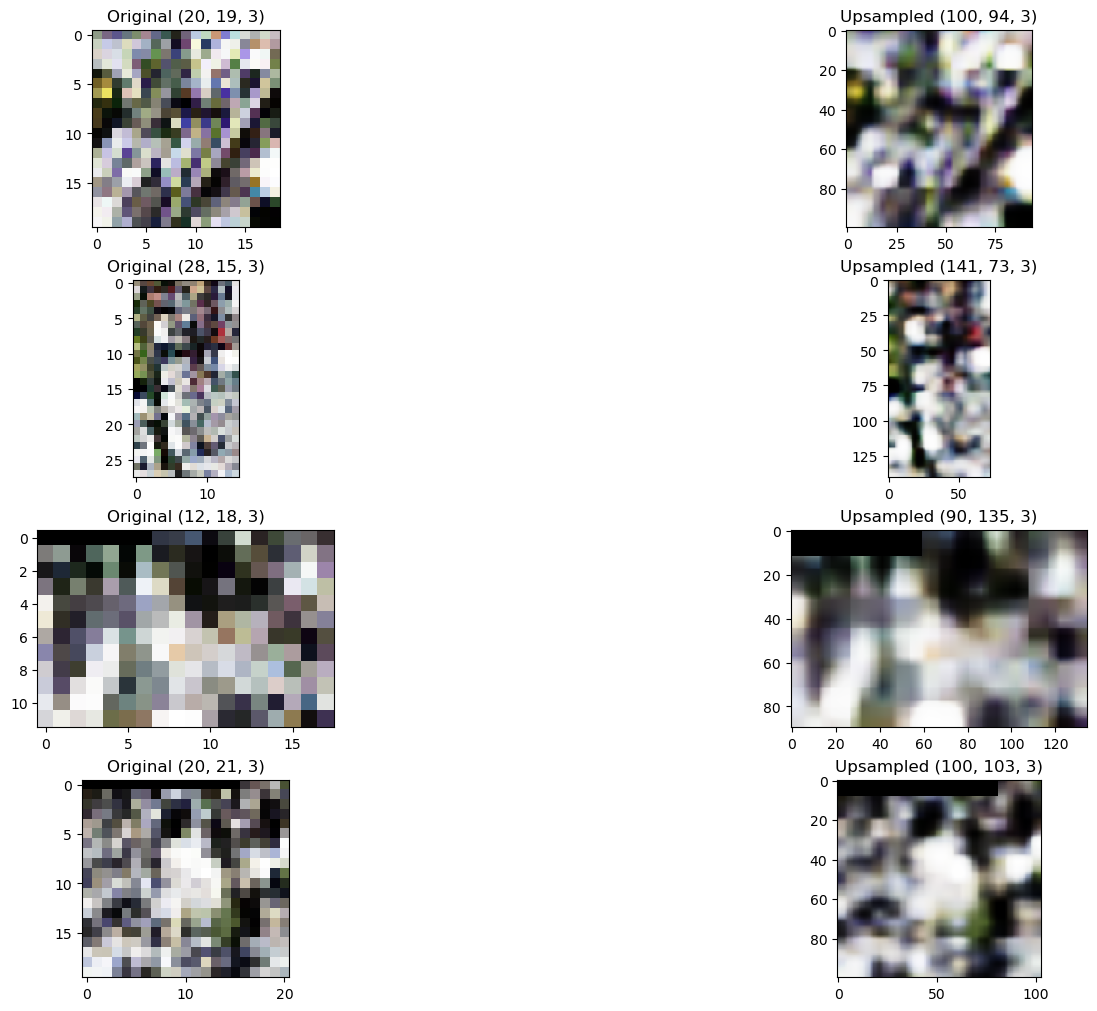

In [10]:
import random

plt.rcParams.update({'font.size': 10})
r, c = 4, 2

fig, axs = plt.subplots(r, c, figsize=(15, 10), constrained_layout=True)
for i in range(r):
    idx = random.randint(0, datasets1.__len__())
    x = datasets1.__getsampletest__(idx)
    x[x == -np.inf] = np.nan
    x[x == np.inf] = np.nan
    
    if x.shape[0] != 3:
        print(f'ERROR - Image dimensions incorrect. First dimension needs to be 3. Dimensions found are {x.shape}')
    
    # original
    out = x.copy()
    out = out.transpose(1, 2, 0)
    
    out = make_color_image_eqh(out[:,:,0], out[:,:,1], out[:,:,2]) #make_color_image_eqh
 
    axs[i][0].set_title(f'Original {out.shape}')
    axs[i][0].imshow(out)
    
#     # skimage downsample
#     out = x.copy()
#     npixels = out.shape[1] * out.shape[2]
#     while npixels > 483:
#         out = skimage.measure.block_reduce(out, block_size=(1, 2, 2), func=np.mean, cval=0, func_kwargs=None)
#         npixels = out.shape[1] * out.shape[2]
#     out = out.transpose(1, 2, 0)
#     out = make_color_image_eqh(out[:,:,0], out[:,:,1], out[:,:,2]) #make_color_image_eqh
    
#     if i == 0:
#         axs[i][1].set_title(f'Skimage Downsampling {out.shape}')
#     axs[i][1].imshow(out)
    
    # pytorch  downsample
    out = x.copy()
    out = torch.tensor(out)
    out = out.unsqueeze(0)
    
    npixels = out.shape[2] * out.shape[3]
    while npixels < 7412:
        out = nn.functional.interpolate(out, scale_factor=(1.5, 1.5), mode='area')
        npixels = out.shape[2] * out.shape[3]
    out = out.squeeze()
    out = np.array(out)
    out = out.transpose(1, 2, 0)
    
    
    out = make_color_image_eqh(out[:,:,0], out[:,:,1], out[:,:,2])

    axs[i][1].set_title(f'Upsampled {out.shape}')
    axs[i][1].imshow(out)
    
savedir = root + f'train/outputs/lowres_upsampled/evaluate/' 
plt.savefig(savedir + 'upsampled_comparison_pca_classifier_accuracy')

# What do the clipped images look like?

(22, 28, 17)
(22, 37, 17)
(22, 28, 17)
(22, 37, 17)


/tmp/ipykernel_165168/862300552.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread(f'download_test/ct1.tif')
/tmp/ipykernel_165168/862300552.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread(f'download_test/ct2.tif')
/tmp/ipykernel_165168/862300552.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img3 = imageio.imread(f'download_test

Text(0.5, 0.98, 'Band 2 (blue)')

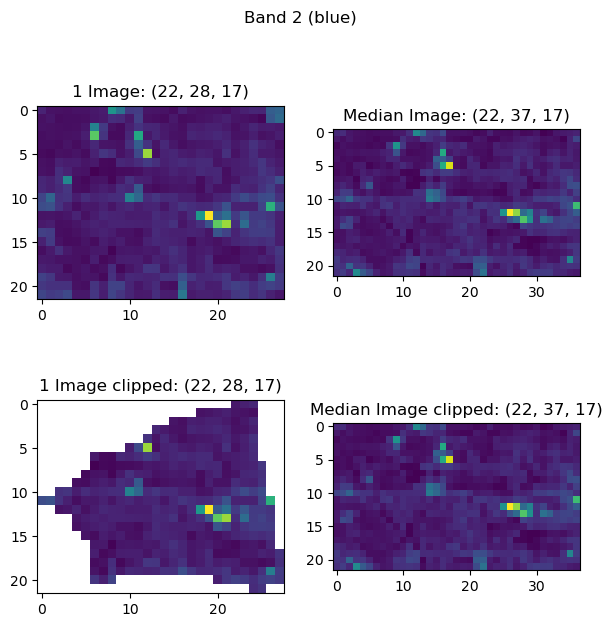

In [9]:
# Load images
import imageio
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

img1 = imageio.imread(f'download_test/ct1.tif')
img2 = imageio.imread(f'download_test/ct2.tif')
img3 = imageio.imread(f'download_test/ct1_clipped.tif')
img4 = imageio.imread(f'download_test/ct2_clipped.tif')

for ax, img, title in zip(axs.flatten(), [img1, img2, img3, img4], 
                          ['1 Image', 'Median Image', '1 Image clipped', 'Median Image clipped']):
    B2_blue = img[:,:,1]
    B3_green = img[:,:,2]
    B4_red = img[:,:,3]

    print(img.shape)
    ax.imshow(B2_blue)
    ax.set_title(f'{title}: {img.shape}')
plt.suptitle('Band 2 (blue)', fontsize=(12))